#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = "/content/TelecomX_Data.json"
df = pd.read_json(url)

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [6]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


##Normalización Churn

In [7]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [8]:
df['Churn']= df['Churn'].map({'Yes': 1, 'No': 0, '':0})
df['Churn'].unique()

array([0, 1])

In [9]:
#df sin diccionarios normalizados
df_Inicial=pd.concat([df['customerID'],df['Churn']],axis=1)

#🔧 Transformación

##Normalización Customers

In [10]:
df_customer = pd.json_normalize(df['customer'])
df_customer.head()


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [11]:
df_customer['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df_customer['Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
df_customer['Partner']= df_customer['Partner'].map({'Yes': 1, 'No': 0})
df_customer['Dependents']= df_customer['Dependents'].map({'Yes': 1, 'No': 0})
df_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


##Normalización Phone

In [14]:
df_phone = pd.json_normalize(df['phone'])
df_phone.head()


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [15]:
df_phone['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df_phone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [17]:
columnas = ['PhoneService', 'MultipleLines']
df_phone[columnas] = df_phone[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [18]:
df_phone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


##Normalización Internet

In [19]:
df_internet = pd.json_normalize(df['internet'])
df_internet.head()


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [20]:
df_internet['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [21]:
columnas= ['OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df_internet[columnas] = df_internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}).fillna(0).astype(int))

In [22]:
df_internet.head()


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


##Normalización Account

In [23]:
df_account = pd.json_normalize(df['account'])
df_account.head()



,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [24]:
df_account.dtypes

,0
Contract,object
PaperlessBilling,object
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,object


In [25]:
df_account['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df_account['PaperlessBilling'].isnull().any()

np.False_

In [27]:
df_account['PaperlessBilling'] = df_account['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [28]:
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,1,Mailed check,65.6,593.3
1,Month-to-month,0,Mailed check,59.9,542.4
2,Month-to-month,1,Electronic check,73.9,280.85
3,Month-to-month,1,Electronic check,98.0,1237.85
4,Month-to-month,1,Mailed check,83.9,267.4


In [29]:
df_account['Charges.Total'] = pd.to_numeric(df_account['Charges.Total'], errors='coerce').fillna(0)


In [30]:
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,1,Mailed check,65.6,593.30
1,Month-to-month,0,Mailed check,59.9,542.40
2,Month-to-month,1,Electronic check,73.9,280.85
3,Month-to-month,1,Electronic check,98.0,1237.85
4,Month-to-month,1,Mailed check,83.9,267.40


##Cuentas diarias

In [31]:
df_account['Cuentas.diarias'] = (df_account['Charges.Monthly']/30).round(2)

In [32]:
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas.diarias
0,One year,1,Mailed check,65.6,593.30,2.19
1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [33]:
df_final = pd.concat([df_Inicial,df_customer,df_phone,df_internet,df_account], axis=1)
df_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas.diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [34]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas.diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


##Analisis de Churn

In [35]:
churn_conteo = df_final['Churn'].value_counts().sort_index()
churn_conteo

,count
Churn,
0,5398
1,1869


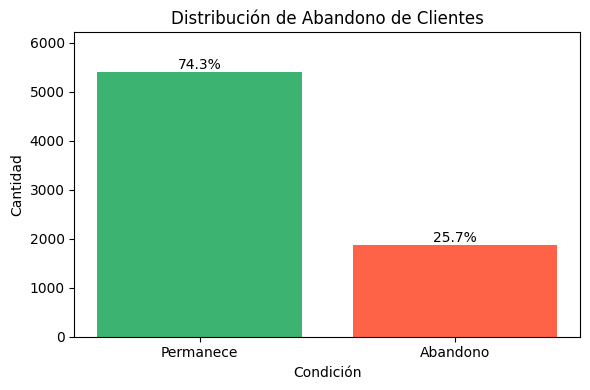

In [36]:
total = churn_conteo.sum()
porcentages = (churn_conteo / total * 100).round(1)
colores = ['mediumseagreen', 'tomato']

plt.figure(figsize=(6, 4))
bars = plt.bar(churn_conteo.index.astype(str), churn_conteo.values, color=colores)

# Añadir etiquetas con porcentaje encima de cada barra
for bar, porcentage in zip(bars, porcentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{porcentage}%',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Condición')
plt.ylabel('Cantidad')
plt.title('Distribución de Abandono de Clientes')
plt.xticks([0, 1], labels=['Permanece', 'Abandono'])
plt.ylim(0, churn_conteo.max() * 1.15)  #porcentajes arriba de cada barra
plt.tight_layout()
plt.show()

##Recuento de abandono por variables categóricas

In [37]:
def generar_graficos(columna, nombre, tamaño):
  # Agrupación y conteo
  grupo = df_final.groupby([columna, 'Churn']).size().unstack().fillna(0)

  # Gráfico de barras agrupadas
  ax = grupo.plot(kind='bar', stacked=False, color=['mediumseagreen', 'tomato'], figsize= tamaño)

  # Agregar las cantidades encima de cada barra individual
  for i, dato in enumerate(grupo.index):
      for j, churn_value in enumerate([0, 1]):
          count = grupo.loc[dato, churn_value]
          if count > 0:
              # Posición horizontal ajustada para cada barra dentro del grupo
              x_pos = i + (j - 0.5) * 0.2  # Separación horizontal entre las barras
              ax.text(x_pos, count + 1, str(int(count)), ha='center', va='bottom', fontsize=9)


  # Personalización del gráfico
  plt.title(f'Cantidad de Abandono por {nombre}')
  plt.xlabel(f'{nombre}')
  plt.ylabel('Cantidad')
  plt.legend(['Permanece', 'Abandono'])
  plt.tight_layout()
  plt.show()

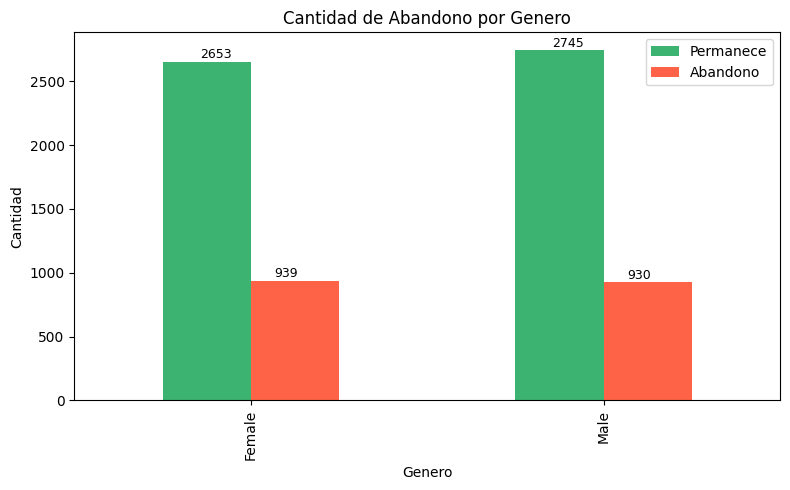

In [38]:
generar_graficos("gender", "Genero", (8, 5))


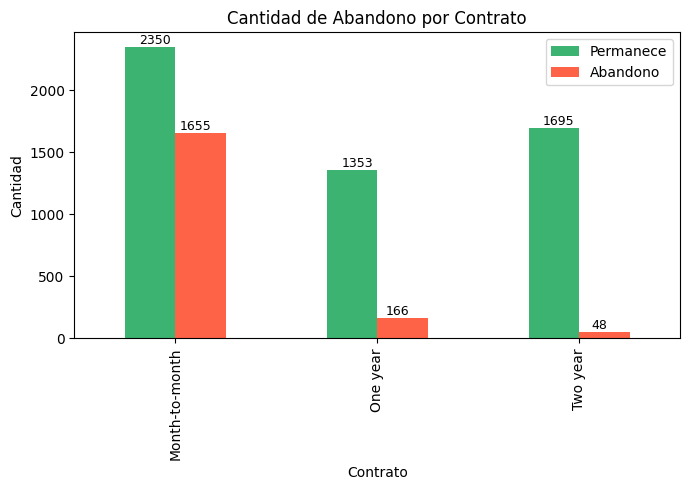

In [39]:
generar_graficos("Contract", "Contrato", (7, 5))


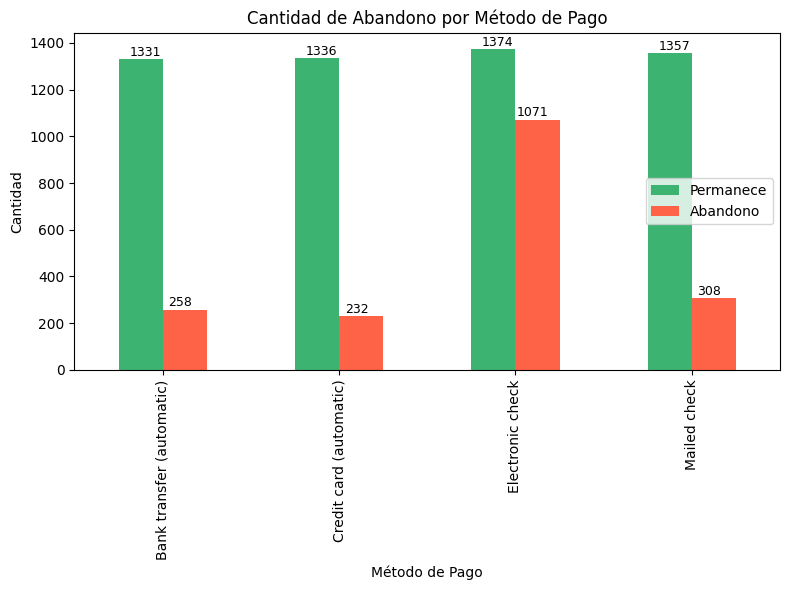

In [40]:
generar_graficos("PaymentMethod", "Método de Pago", (8, 6))

##Conteo de evasión por variables numéricas

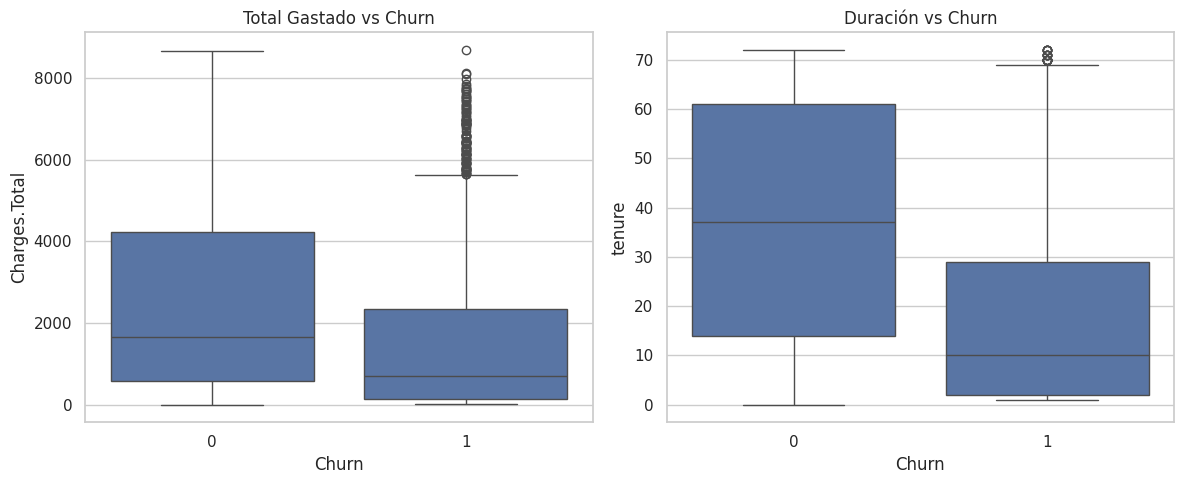

In [41]:

sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))

# Total gastado
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=df_final)
plt.title('Total Gastado vs Churn')

# Duración
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_final)
plt.title('Duración vs Churn')

plt.tight_layout()
plt.show()

#📄Informe final

###Introducción

La empresa Telecom X, solicitó la ETL de sus datos de cancelación o abandono de sus cleintes, con el fin de extraer conclusiones valiosas para tomar desiciones en un corto y mediano plazo. Con este análisis se busca maximizar las ganancias y evitar el abandono de la compañia.

###Limpieza y Tratamiento de Datos

Para iniciar el ETL, se trabajo con un archivo .json, el cual algunas columnas pasaron por proceso de normalización para facilitar la visualización de los datos.

Posterior, se normalizaron los datos, por ejemplo, las columnas que con datos "yes" y "No", se transformaron a valores de 1s y 0s (booleanos), además, se identificaron strings con valores numéricos y se transformaron a int o float según dependiara la columna.

Finalmente, se creo una nueva columna en base a los Charges.total, para entender el comportamiento diario de los abandonos de los clientes.

###Análisis exploratorio de los datos

Para iniciar, se graficó y analizó, mediante gráfico de barra, la cantidad total de abandono, logrando visualizar que aproximadamente un 25% del total ha abandonado a la compapañia.

Como segundo paso, se graficó y analizó, mediante gráfico de barra, la cantidad de abandono por variables categoricas, como lo son, por genero, metodos de pago y por contrato, logrando establecer conclusiones seguras para la posterior toma de desiciones.

Para finalizar, mediante un boxplot, se cruzó el Churn con el total gastado y el Churn con la duración. Se observó lo siguiente:
- Que los clientes que no han hecho churn tienden a tener una mayor mediana de gasto total, lo que indica que han permanecido más tiempo pagando por el servicio.

- En contraste, los clientes que hicieron churn presentan valores de gasto más bajos en promedio y menor dispersión, lo que sugiere que muchos abandonaron el servicio en etapas tempranas.

- La mediana de tenure para los clientes que se mantienen (Churn = 0) es claramente más alta que la de los clientes que abandonaron.

- Los clientes con churn tienden a concentrarse en los rangos bajos de duración, lo que refuerza la hipótesis de que la mayoría de las bajas ocurren en los primeros meses del ciclo de vida del cliente.

###Conclusiones e insights

El mayor abandono o Churn de los clientes son en contratos de mes a mes, por ende significa, que no existen políticas o incentivos para permanecer en la compañia, lo que no la hace atractiva para posibles clientes nuevos. En otros aspectos o variables a comparar, los valores porcentuales son relativamente bajos en cantidades, lo que no permitiria tomar una buena desición para el numero de abandono.

###Recomendaciones

Como principal recomendación se propone, incentivar a los clientes nuevos a permanecer en la compañia, esto se puede lograr con inicitivas que ayuden a mantener y evitar el abandono.

- Incentivos para firmar un contrato de un año mediante promociones, productos y descuentos.
- Proponer diferentes metodos de pago para los primeros meses.